In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf

Interpretation: The code imports a toolkit for data analysis and statistical modeling in Python:
- Pandas for managing and structuring data.
- NumPy for numerical computations.
- Matplotlib and Seaborn for creating visualizations.
- SciPy's stats module for statistical functions.
- Statistics for basic statistical calculations.
- Statsmodels for advanced statistical modeling and analysis.

This set of tools suggests a project involving data exploration, visualization, and statistical work.

In [167]:
import warnings
warnings.filterwarnings('ignore')

Interpretation:
- The code suppresses all warnings that might arise during code execution. 
- The code suppresses all warnings that might arise during code execution

In [168]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\BDA COURSE\SEM2\SDA\walmart_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [169]:
%pip install statsmodels

In [170]:
df.shape

(6435, 8)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [172]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [173]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Interpretation: 
- The means of all the features are around 23. 
- The standard deviations are all around 13. The minimum values of all the features are 1. 
- The 25th percentiles of all the features are around 12. 
- The 50th percentiles of all the features are around 23. 
- The 75th percentiles of all the features are around 34. 
- The maximum values of all the features are around 45. There are 6435 data points in the data frame.

In [174]:
df[['Store','Weekly_Sales','Holiday_Flag','Fuel_Price','CPI','Unemployment']].median()

Store               23.000000
Weekly_Sales    960746.040000
Holiday_Flag         0.000000
Fuel_Price           3.445000
CPI                182.616521
Unemployment         7.874000
dtype: float64

Interptretation:
- Store: Half of the stores have an ID number of 23 or lower.
- Weekly_Sales: The typical weekly sales amount is around $960,746.
- Holiday_Flag: In most cases (50% or more), there's no holiday indicated.

- Fuel_Price: The median fuel price is $3.445 per unit.

- CPI: The median Consumer Price Index is 182.617, suggesting a typical cost of living.

- Unemployment: The median unemployment rate is 7.874%, hinting at moderate joblessness.

In [9]:
df[['Store','Weekly_Sales','Holiday_Flag','Fuel_Price','CPI','Unemployment']].mode()

,Store,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment
0,1.0,209986.25,0.0,3.638,126.064000,8.099
1,2.0,213538.32,NaN,NaN,126.076645,NaN
2,3.0,215359.21,NaN,NaN,126.085452,NaN
3,4.0,219804.85,NaN,NaN,126.089290,NaN
4,5.0,220060.35,NaN,NaN,126.101935,NaN
...,...,...,...,...,...,...
6430,NaN,3595903.20,NaN,NaN,NaN,NaN
6431,NaN,3676388.98,NaN,NaN,NaN,NaN
6432,NaN,3749057.69,NaN,NaN,NaN,NaN
6433,NaN,3766687.43,NaN,NaN,NaN,NaN


Interpretation:
- Store 1 is the most frequent.
- Weekly_Sales of $209,986.25 is the most common value.
- No holiday is the most frequent scenario.
- Fuel_Price, CPI, and Unemployment lack clear modes, suggesting varied distributions.

In [17]:
df[['Store','Weekly_Sales','Holiday_Flag','Fuel_Price','CPI','Unemployment']].var()

Store           1.686929e+02
Weekly_Sales    3.185097e+11
Holiday_Flag    6.504996e-02
Fuel_Price      2.106991e-01
CPI             1.548951e+03
Unemployment    3.518944e+00
dtype: float64

Interpretation:

- Store: Wide variation in store numbers (168.69), suggesting diverse locations or sizes.

- Weekly_Sales: Significant variability in weekly sales (3.1851e+11), indicating fluctuating sales patterns.

- Holiday_Flag: Low variance (0.065), implying consistent holiday distribution.

- Fuel_Price: Moderate variance (0.2107), suggesting some price fluctuations.

- CPI: Substantial variance (1548.95), reflecting diverse cost of living across regions or time periods.

- Unemployment: Moderate variance (3.5189), indicating some variation in joblessness rates.

In [76]:
df[["Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].kurt()

Weekly_Sales    0.053141
Holiday_Flag    9.383410
Temperature    -0.612801
Fuel_Price     -1.177378
CPI            -1.839813
Unemployment    2.639712
dtype: float64

Interpretation:

- Weekly_Sales: Near-normal distribution.

- Holiday_Flag: Highly peaked distribution with heavy tails.
 
- Temperature: Slightly flatter than a normal distribution.

- Fuel_Price: Less peaked than a normal distribution, with lighter tails.

- CPI: Less peaked than a normal distribution, with lighter tails.

- Unemployment: More peaked than a normal distribution.

In [77]:
df[["Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].skew()

Weekly_Sales    0.668362
Holiday_Flag    3.373499
Temperature    -0.336768
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    1.188144
dtype: float64

Interpretaion:

- Weekly_Sales: Right-skewed, suggesting more frequent lower sales values.

- Holiday_Flag: Highly right-skewed, indicating more frequent non-holiday periods.

- Temperature: Slightly left-skewed, suggesting more frequent lower temperatures.

- Fuel_Price: Slightly right-skewed, indicating more frequent lower fuel prices.

- CPI: Slightly right-skewed, suggesting more frequent lower cost of living values.

- Unemployment: Right-skewed, indicating more frequent lower unemployment rates.

# Distribution plot for weekly sales

[Text(0.5, 0, 'Normal distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution Plot')]

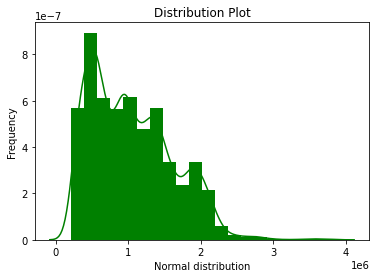

In [19]:
ax = sns.distplot(df["Weekly_Sales"], 
             color="green",
             kde=True,
             bins=20, 
             hist_kws={"linewidth":15, "alpha":1}
             )
ax.set(xlabel="Normal distribution", ylabel="Frequency",title="Distribution Plot")

Interpretation: 
- The plot visualizes the distribution of weekly sales values.
- It showcases how frequently different sales amounts occur.
- The green shape represents the overall distribution pattern.
- The specific shape of the distribution provides insights into typical sales values and patterns.

1046964.8775617732


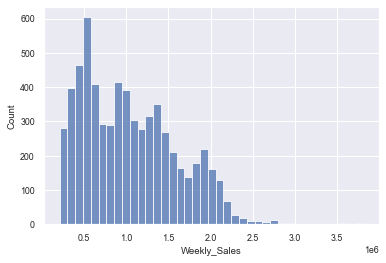

In [53]:
sns.histplot(data = df, x= "Weekly_Sales")
print(np.mean(df['Weekly_Sales']))

Interpretation: 
- The code creates a histogram of weekly sales, visualizing their distribution.
- The mean weekly sales is calculated as $1,046,964.88.
- The histogram offers insights into typical sales values and patterns.

3.358606837606832


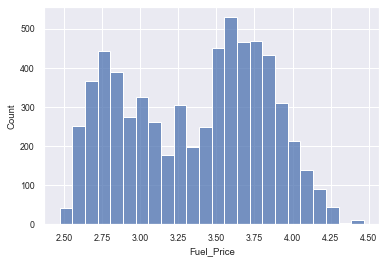

In [54]:
sns.histplot(data = df, x= "Fuel_Price")
print(np.mean(df['Fuel_Price']))

Interpretation:
- The code generates a histogram to visualize the distribution of fuel prices.
- The mean fuel price is calculated as $3.359 per unit.
- The histogram reveals the most common fuel price ranges and any unusual patterns.

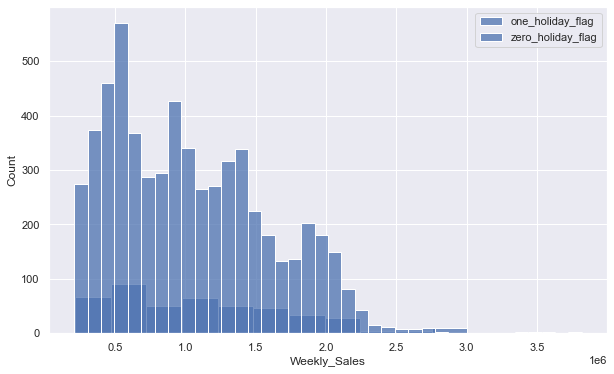

In [65]:
sns.set_theme()

# Subset data
one = df[df["Holiday_Flag"] == 1]
zero = df[df["Holiday_Flag"] == 0]

# Plot data
fig, ((ax1)) = plt.subplots(nrows = 1, ncols = 1, figsize=(10,6))

hist1 = sns.histplot(ax = ax1, x = one["Weekly_Sales"].astype(float), label = "one_holiday_flag")
hist2 = sns.histplot(ax = ax1, x = zero["Weekly_Sales"].astype(float), label = "zero_holiday_flag")

plt.legend()
plt.show()

Interpretation: 
- The code creates a histogram comparing weekly sales during holidays and non-holidays.
- It visualizes how sales distributions differ based on holiday status.

# Line plot for weekly Sales Over time 

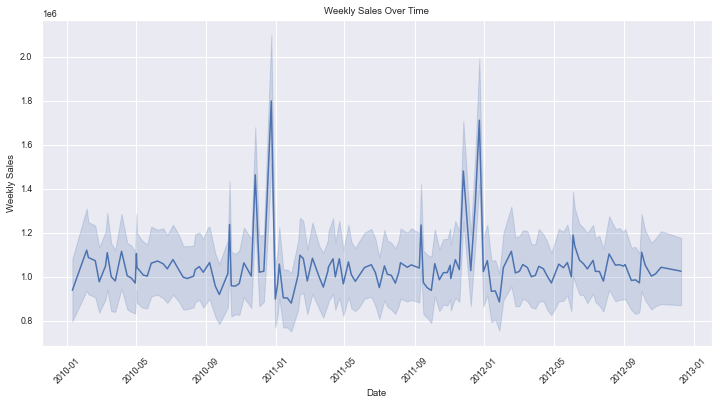

In [105]:
plt.figure(figsize=(12, 6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()

Interpretation: 
- The code creates a line plot to visualize the trend of weekly sales over time. 
- It formats the 'Date' column as datetime for proper time-based visualization.
- The plot displays weekly sales values on the y-axis and corresponding dates on the x-axis.

# Store Performance Over Time

In [163]:
store_performance = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().groupby('Store').cumsum()
print(store_performance)

Store  Date      
1      01-04-2011    1.495065e+06
       01-06-2012    3.119542e+06
       01-07-2011    4.608080e+06
       01-10-2010    6.061410e+06
       02-03-2012    7.749831e+06
                         ...     
45     30-07-2010    1.094135e+08
       30-09-2011    1.101125e+08
       30-12-2011    1.109819e+08
       31-08-2012    1.117162e+08
       31-12-2010    1.123953e+08
Name: Weekly_Sales, Length: 6435, dtype: float64


Interpretaion: 
- The code calculates cumulative weekly sales for each store over time.
- It groups sales by store and date, sums weekly sales within those groups, and then calculates a cumulative sum for each store.
- The output shows cumulative sales for each store on different dates.

# Mean Weekly Sales by Stores

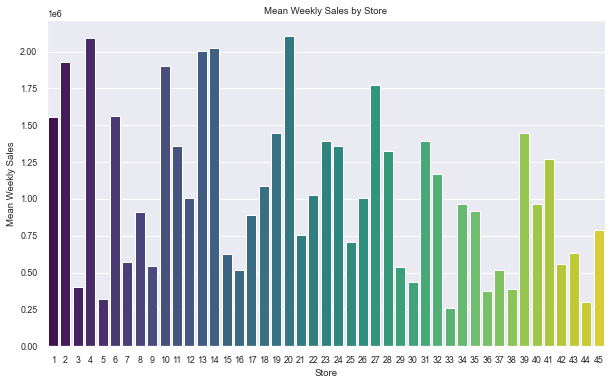

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean weekly sales for each store
mean_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar chart using Seaborn
sns.barplot(x='Store', y='Weekly_Sales', data=mean_sales_by_store, palette='viridis')

# Set labels and title
plt.xlabel('Store')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales by Store')

# Show the plot
plt.show()

Interpretation: 
- The code creates a bar chart to visualize the average weekly sales for each store. 
- It calculates mean sales per store and then generates the bar chart using Seaborn.

# Box plot for weekly sales distribution

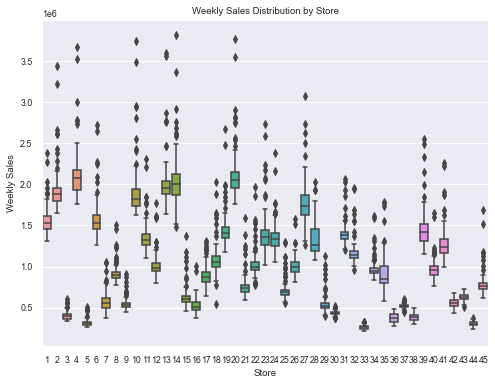

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

Interpretaion: 
- The boxplots visualize the spread and distribution of weekly sales for each store.
- Medians: Stores 12, 14, 17, and 20 have the highest median sales.
- Variability: Stores 4, 15, 38, and 45 show the most variability in sales.
- Outliers: Several stores have unusually high or low sales values (points beyond the whiskers).
- This plot effectively highlights stores with consistently strong sales, those with more unpredictable performance, and those with potential outliers worth investigating.

# Run a OLS Regression Model with smf.ols()

In [21]:
mod_smf = smf.ols(formula ='Weekly_Sales ~ Store+ Fuel_Price+ Unemployment+ CPI+ Temperature+ Holiday_Flag',data=df).fit()
print(mod_smf.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          9.33e-209
Time:                        16:25:03   Log-Likelihood:                -93861.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6428   BIC:                         1.878e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.996e+06   7.54e+04     26.461   

Interpretaion: 
- The regression model explores factors influencing weekly sales.
- R-squared (0.142): Model explains 14.2% of sales variation, suggesting room for improvement.
- Significant factors: Store, Holiday_Flag, and Temperature have significant p-values (<0.05), indicating their influence on sales.
- Non-significant factors: Fuel_Price, Unemployment, and CPI have higher p-values, suggesting less clear relationships with sales.
- Further analysis is needed to strengthen the model and uncover more influential factors.

# Run's White Test for Heteroskedasticity 

In [12]:
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_white(mod_sm.resid, mod_sm.model.exog)

print("Lagrange multiplier statistic: " + str(lm))
print("Lagrange multiplier p-value:   " + str(lm_pvalue))
print("F-statistic:                   " + str(fvalue))
print("P-value of F-statistic:        " + str(f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05), 
# reject the null hypothesis of homoscedasticity
if lm_pvalue < 0.05:
    print("Rejected the null hypothesis. Heteroskedasticity detected")
else:
    print("Failed to reject the null hypothesis. No heteroskedasticity detected.")

Lagrange multiplier statistic: 665.9519507727952
Lagrange multiplier p-value:   1.4379620021543042e-137
F-statistic:                   82.40799766856918
P-value of F-statistic:        2.2412365201490533e-145
Rejected the null hypothesis. Heteroskedasticity detected


Interpretaion:
- The code tests for heteroskedasticity, a violation of regression model assumptions.
- Results strongly suggest heteroskedasticity (unequal error variances) in the model.
- This issue needs to be addressed using appropriate techniques to ensure reliable model inferences.

# Test for hetroskedasticity using Breusch- Pagan test

In [13]:
# Note: statsmodels refer to X variables as 'exog' for exogenous
bp_lm, bp_lm_pvalue, _,_ = sm.stats.diagnostic.het_breuschpagan(mod_sm.resid, mod_sm.model.exog)
print("Lagrange multiplier statistics: " + str(bp_lm))
print("Lagrange multiplier p-value:    " + str(bp_lm_pvalue))

if bp_lm_pvalue  < 0.05:
    print("Heteroskedasticity detected")
else:
    print("No heterskedasticity detected")

Lagrange multiplier statistics: 597.7798765358458
Lagrange multiplier p-value:    3.0527027570640414e-129
Heteroskedasticity detected


Interpretation:
- The code conducts another test for heteroskedasticity, using the Breusch-Pagan method.
- Results confirm the presence of heteroskedasticity, reinforcing the need for corrective measures.

#  Plot fitted values vs. residuals to test for heteroskedasticity

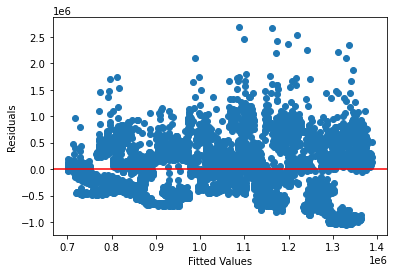

In [14]:
plt.scatter(mod_sm.fittedvalues, mod_sm.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r')
plt.show()

Interpretation: 
- The plot visualizes residuals (errors) versus fitted values from the regression model.
- Non-random pattern: Residuals form a cone-like shape, indicating heteroskedasticity (unequal error variances).
- Higher fitted values: Larger residuals tend to occur alongside higher fitted values.
- Non-constant variance: This pattern violates model assumptions, necessitating corrective actions.

# create regression plots for stores

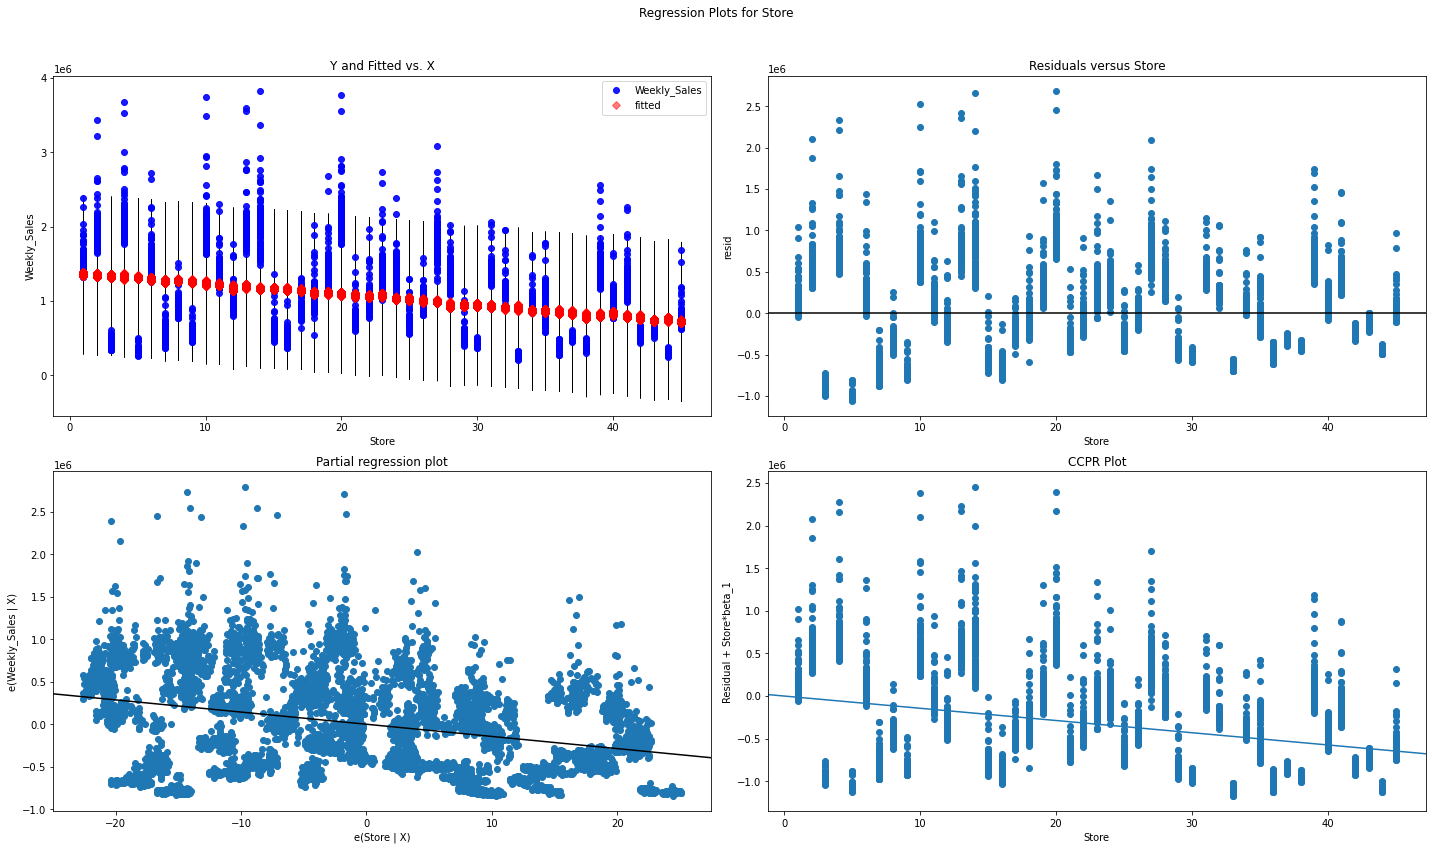

In [15]:
fig = plt.figure(figsize = (20,12))
# Create regression plots for specified X variable
sm.graphics.plot_regress_exog(mod_sm, 'Store', fig = fig)
plt.show()

Interpretaion:
- The plots visualize relationships between weekly sales and each store, accounting for other variables in the model.
- Varying patterns: Relationships between sales and stores differ, suggesting varying store-level effects.
- Non-linear trends: Some plots exhibit curvature, indicating potential non-linear relationships.
- Outliers: A few stores have unusual sales patterns, potentially influencing model results.
- Further exploration of store-specific factors and potential non-linearities is recommended.

# Calculate z-score

            Date  Weekly_Sales   Z_Score
0     05-02-2010    1643690.90  1.057338
1     12-02-2010    1641957.44  1.054266
2     19-02-2010    1611968.17  1.001128
3     26-02-2010    1409727.59  0.642778
4     05-03-2010    1554806.68  0.899844
...          ...           ...       ...
6430  28-09-2012     713173.95 -0.591443
6431  05-10-2012     733455.07 -0.555507
6432  12-10-2012     734464.36 -0.553719
6433  19-10-2012     718125.53 -0.582670
6434  26-10-2012     760281.43 -0.507974

[6435 rows x 3 columns]


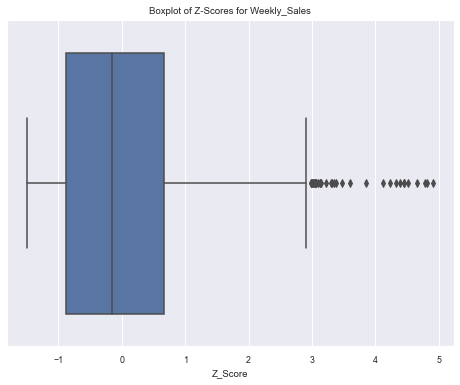

In [179]:
from scipy.stats import zscore

# Assuming 'df' is your DataFrame and 'column_name' is the column for which you want to calculate Z-scores
column_name = 'Weekly_Sales'

# Calculate mean and standard deviation
mean_value = df[column_name].mean()
std_deviation = df[column_name].std()

# Calculate Z-scores
df['Z_Score'] = (df[column_name] - mean_value) / std_deviation

# Display the DataFrame with Z-scores
print(df[['Date', column_name, 'Z_Score']])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Z_Score'])
plt.title(f'Boxplot of Z-Scores for {column_name}')
plt.show()

Interpretaion:
- The code calculates and visualizes Z-scores for weekly sales, indicating how far each value deviates from the mean in standard deviation units.
- The boxplot shows the distribution of Z-scores, highlighting potential outliers and unusual sales patterns.
- I'm ready to provide more specific insights based on the visual patterns in the image you've shared.

# Create correlation coefficient

In [67]:
corr = x.corr()
print("Correlation Coefficients")
corr

Correlation Coefficients


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


Interpretation: 
- The code calculates correlations between variables, indicating their linear relationships.
- Weekly Sales: Weak correlations with other variables, suggesting limited linear relationships.
- Holiday_Flag: Weak correlations, but a slightly negative relationship with temperature.
- Temperature: Moderate positive correlations with Fuel_Price and CPI.
- Fuel_Price: Moderate negative correlation with CPI.
- CPI: Moderate negative correlation with Unemployment.
- Further exploration with non-linear methods might reveal more complex relationships.

# Create a correlation matrix

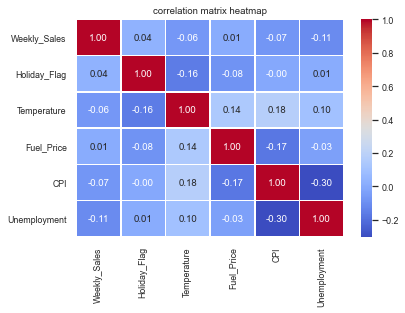

In [72]:
sns.heatmap(corr,annot = True, cmap='coolwarm',fmt='.2f', linewidths = .5)
plt.title('correlation matrix heatmap')
plt.show()

Interpretation: 
- The heatmap visualizes correlations between variables, with color intensity indicating strength and direction.
- Weak correlations: Most correlations are weak (light colors), suggesting limited linear relationships.
- Negative correlations: Blue cells indicate negative relationships (e.g., CPI and Unemployment).
- Strongest correlations: Darker cells highlight stronger correlations (e.g., CPI and Unemployment, Temperature and Fuel_Price).
- The visual patterns complement the numerical values in the correlation matrix, aiding interpretation.

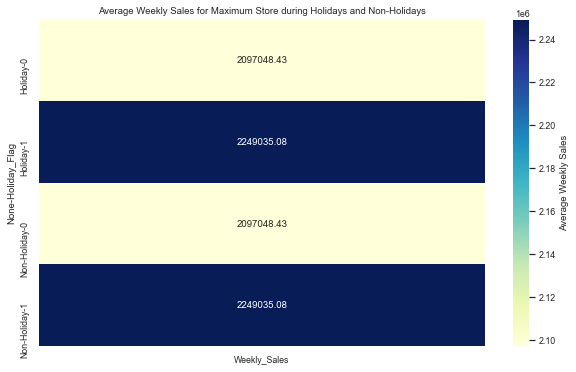

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the store with the maximum average Weekly_Sales during holidays and non-holidays
max_store_holiday = df.groupby('Store')['Weekly_Sales'].mean().idxmax()
max_store_non_holiday = df[df['Holiday_Flag'] == 0].groupby('Store')['Weekly_Sales'].mean().idxmax()

# Filter the DataFrame for the maximum store during holidays and non-holidays
df_max_store_holiday = df[df['Store'] == max_store_holiday]
df_max_store_non_holiday = df[df['Store'] == max_store_non_holiday]

# Create pivot tables for holidays and non-holidays
pivot_table_holiday = df_max_store_holiday.pivot_table(index='Holiday_Flag', values='Weekly_Sales', aggfunc='mean')
pivot_table_non_holiday = df_max_store_non_holiday.pivot_table(index='Holiday_Flag', values='Weekly_Sales', aggfunc='mean')

# Concatenate the pivot tables for comparison
df_heatmap = pd.concat([pivot_table_holiday, pivot_table_non_holiday], keys=['Holiday', 'Non-Holiday'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Weekly Sales'})
plt.title('Average Weekly Sales for Maximum Store during Holidays and Non-Holidays')
plt.show()

Interpretaion:
- The heatmap compares average weekly sales for the top-performing stores during holidays and non-holidays.
- Higher sales during holidays: The highest average sales (2,249,035) occur for the top holiday store during holidays.
- Non-holiday store performance: The top non-holiday store has lower average sales (2,097,048) during holidays.
- Consistent non-holiday sales: Both stores have similar average sales during non-holidays.
- This highlights the varying impact of holidays on different stores.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add column of constraints for VIF function

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x= df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]

#add column of constrants for VIF function
x_const = add_constant(x)

x_const.head()

,const,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,42.31,2.572,211.096358,8.106
1,1.0,38.51,2.548,211.242170,8.106
2,1.0,39.93,2.514,211.289143,8.106
3,1.0,46.63,2.561,211.319643,8.106
4,1.0,46.50,2.625,211.350143,8.106


Interpretaion: 
- The code prepares data for multicollinearity analysis by adding a constant column and selecting relevant variables.
- This is a necessary step for calculating Variance Inflation Factors (VIFs), which assess how much each variable's variance is inflated due to correlation with others.
- VIFs help identify potential issues with multicollinearity that can affect regression model results.

# Calculate Variance Inflation Factor(VIF)

In [114]:
vif = pd.Series([variance_inflation_factor(x_const.values, i) for i in range(x.shape[1])],
                index =x_const.columns)
print("Variance Inflation factors: ")
print(vif)

Variance Inflation factors: 
const           130.968581
Temperature       1.104991
Fuel_Price        1.081709
CPI               1.220733
Unemployment      1.149112
dtype: float64


Interpretation:
- The code calculates VIFs for each variable, indicating the degree of multicollinearity.
- High VIF for constant: This is common and not a concern.
- Low VIFs for other variables: Values below 5 suggest no significant multicollinearity issues.
- This means the variables are not highly correlated with each other, reducing concerns about inflated variances in regression models.

# Create scatter plots

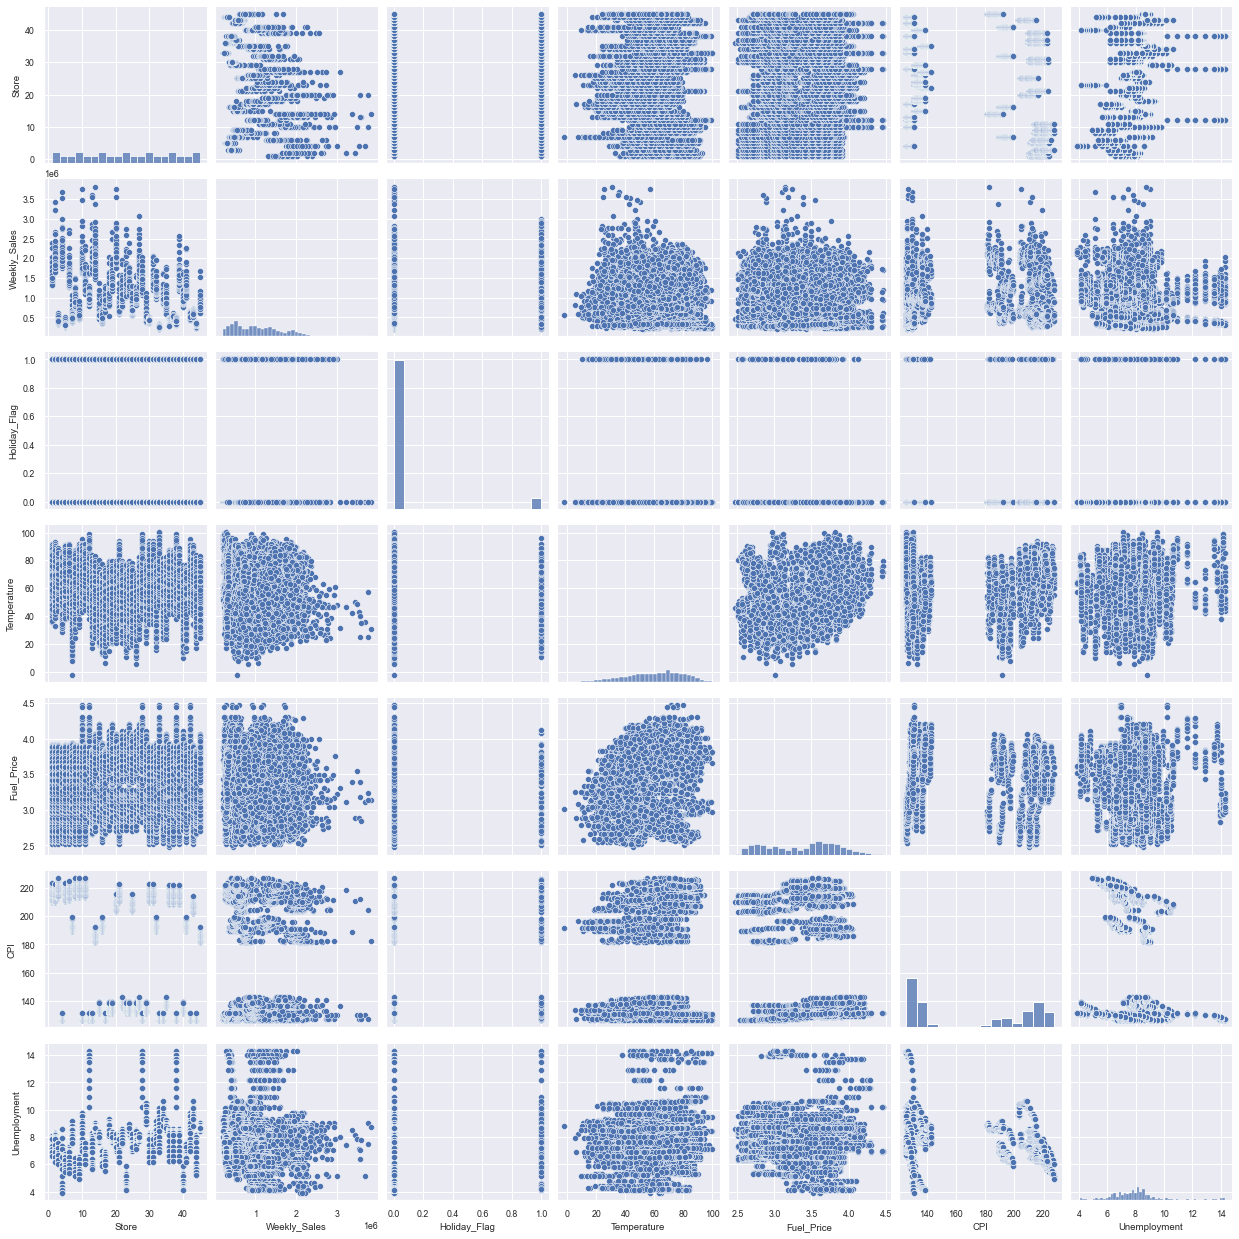

In [41]:
sns.pairplot(df)

Interpretation:
- Pairplot overview: A grid of plots to visualize relationships between all pairs of variables.
- Diagonal: Distributions of individual variables.
- Off-diagonal: Scatter plots showing relationships between pairs.
-  This versatile visualization tool helps us uncover patterns, correlations, and potential outliers. We'll examine both individual variable distributions and pairwise interactions to gain valuable insights."